In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = "06"
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()



In [5]:
#  3. Convert the June temperatures to a list.
# june_temps = list(np.ravel(results))
june_temps = list(results)
june_temps

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(june_temps, columns=["Date", "June Temps"])
jun_df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str_2 = "12"
results_2 = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str_2).all()



In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(results_2)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=["Date", "December Temps"])
dec_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 0, 'Degrees (F)')

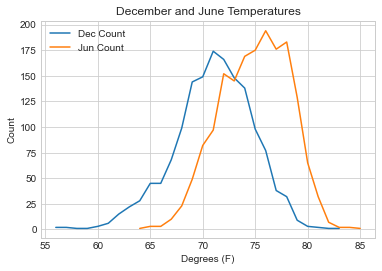

In [37]:
# Extra Analysis

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


dec_temps_count = dec_df.groupby(["December Temps"]).count()
jun_temps_count = jun_df.groupby(["June Temps"]).count()


plt.plot(dec_temps_count.rename(columns={"Date": "Dec Count"}), label="Dec Count")
plt.plot(jun_temps_count.rename(columns={"Date": "Jun Count"}), label="Jun Count")
plt.title("December and June Temperatures")
plt.legend()
plt.ylabel("Count")
plt.xlabel("Degrees (F)")




    




In [41]:
## Could also achieve above with below queries, but these seem unnecessary as we already have the data!

#For Dec
dec_counts_query = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.tobs).\
    order_by(func.count(Measurement.tobs).desc()).all()
dec_counts_list = list(dec_counts_query)
dec_counts_df_2 = pd.DataFrame(dec_counts_query, columns=["Degrees", "Count"])
dec_counts_df_2





,Degrees,Count
0,71.0,174
1,72.0,166
2,70.0,149
3,73.0,148
4,69.0,144
5,74.0,138
6,68.0,99
7,75.0,98
8,76.0,77
9,67.0,68


In [42]:
#For June
jun_counts_query = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.tobs).\
    order_by(func.count(Measurement.tobs).desc()).all()
jun_counts_list = list(jun_counts_query)
jun_counts_df_2 = pd.DataFrame(jun_counts_list, columns=["Degrees", "Count"])
jun_counts_df_2

,Degrees,Count
0,76.0,194
1,78.0,183
2,77.0,176
3,75.0,175
4,74.0,169
5,72.0,152
6,73.0,145
7,79.0,129
8,71.0,97
9,70.0,82
